In [1]:
# Librarite e perdorura 

import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split

In [2]:
# Leximi i dataset-it nga source!

dataset=pd.read_csv('../data/gjobat-e-leshuara.csv')

In [3]:
# Para Procesimi

# Kontrollojme se a mungon ndonje vlere

dataset.isnull().sum()

# Ndryshimi i emrave te kolonave te caktuara

dataset.rename(columns={'LLOJI_KOMPAN': 'LLOJI_KOMPANISE', 'NR_TATIM': 'NR_TATIMIT'}, inplace=True)
print(dataset)

              VITI  MUAJI                                PERSHKRIMI_SEKTORIT  \
0          1  2020     12                                       Ndertimtaria   
1          2  2017      7                      Aktivitetet e tjera sherbyese   
2          3  2023      7                      Aktivitetet e tjera sherbyese   
3          4  2022      3  Tregtia me shumice dhe pakice; Riparimi i mjet...   
4          5  2021      4  Tregtia me shumice dhe pakice; Riparimi i mjet...   
...      ...   ...    ...                                                ...   
29702  29703  2022      1                                       Ndertimtaria   
29703  29704  2021      2                               Industria perpunuese   
29704  29705  2023      5                    Bujqesia;Pylltaria dhe Peshkimi   
29705  29706  2017      3  Tregtia me shumice dhe pakice; Riparimi i mjet...   
29706  29707  2019     10                                       Ndertimtaria   

      LLOJI_KOMPANISE        KOMUNA  PE

In [4]:
# Definimi i tipeve

print(dataset.dtypes)

                         int64
VITI                     int64
MUAJI                    int64
PERSHKRIMI_SEKTORIT     object
LLOJI_KOMPANISE         object
KOMUNA                  object
PEN_NO                   int64
PEN_TYPE_DESC_F         object
NR_TATIMIT               int64
NR_GJOBAVE               int64
VLERA                  float64
dtype: object


In [5]:
# Paraqitja e numrit te rreshtave dhe kolonave

dataset.shape

(29707, 11)

In [6]:
# Integrimi

dataset['MUAJI/VITI'] = dataset['MUAJI'].astype(str) + '/' + dataset['VITI'].astype(str)

In [7]:
# Agregimi

Vlerat_bazuar_ne_vite = dataset.groupby('VITI')['VLERA'].sum()
print(Vlerat_bazuar_ne_vite)

VITI
2017    4493793.67
2018    5292878.74
2019    4051990.32
2020    2536865.26
2021    4527659.25
2022    5517707.53
2023    3240372.68
Name: VLERA, dtype: float64


In [8]:
# Mostrimi

gjatesia_e_mostres = 100 
mostra = dataset.sample(n=gjatesia_e_mostres, random_state=42)

print("Mostrimi random:")
print(mostra)

Mostrimi random:
              VITI  MUAJI                                PERSHKRIMI_SEKTORIT  \
8211    8212  2021      4  Tregtia me shumice dhe pakice; Riparimi i mjet...   
8218    8219  2022      7                          Transporti dhe magazinimi   
18729  18730  2020      6                    Akomodimi dhe sherbimi ushqimor   
14034  14035  2023      6                      Aktivitetet e tjera sherbyese   
13433  13434  2021      8  Tregtia me shumice dhe pakice; Riparimi i mjet...   
...      ...   ...    ...                                                ...   
5824    5825  2018      7                    Akomodimi dhe sherbimi ushqimor   
11839  11840  2020     12  Tregtia me shumice dhe pakice; Riparimi i mjet...   
9040    9041  2018      2  Tregtia me shumice dhe pakice; Riparimi i mjet...   
12691  12692  2020      7                                       Person Fizik   
4546    4547  2018      4  Tregtia me shumice dhe pakice; Riparimi i mjet...   

         LLOJI_KOMPANI

In [9]:
# Pastrimi

print("Numri i rreshtave dhe kolonave para pastrimit")
print(dataset.shape)

# Emertimi i rregullt i kolones "KOMUNA"
dataset['KOMUNA'] = dataset['KOMUNA'].str.replace('Ã‹', 'Ë')

print("Paraqitja e kolonave qe permbajne vlera null:")
print(dataset.isnull().sum())
print("\n")

print("Rreshtat duplikat:")
print(dataset.duplicated().sum())
print("\n")

#Largon kolonen e pare
dataset = dataset.drop(dataset.columns[0], axis=1)

# Outliners

# Llogarit z-scores për kolonën e përcaktuar
z_scores = (dataset['VLERA'] - dataset['VLERA'].mean()) / dataset['VLERA'].std()

# Caktimi i pragut per konsiderimin e te dhënave si outliers (p.sh., 3 devijimet standard)
pragu = 3
# Krijo një maske per te identifikuar outliers
maska_outliers = abs(z_scores) >= pragu

# Nxirr dhe printo vlerat që u larguan (outliers)
vlerat_e_larguara = dataset.loc[maska_outliers, 'VLERA']
print("Vlerat që u larguan (outliers):")
print(vlerat_e_larguara)

# Krijo një dataset të ri pa outliers
dataset = dataset[~maska_outliers]

# Shfaq informata rreth datasetit para dhe pas largimit të outliers
print(f"Forma origjinale e datasetit: {dataset.shape}")

# Zevendsimi i vlerave lowercase ne uppercase per kolonen 'KOMUNA'
dataset['KOMUNA'] = dataset['KOMUNA'].str.upper()

print("Numri i rreshtave dhe kolonave pas pastrimit")
print(dataset.shape)


Numri i rreshtave dhe kolonave para pastrimit
(29707, 12)
Paraqitja e kolonave qe permbajne vlera null:
                       0
VITI                   0
MUAJI                  0
PERSHKRIMI_SEKTORIT    0
LLOJI_KOMPANISE        0
KOMUNA                 0
PEN_NO                 0
PEN_TYPE_DESC_F        0
NR_TATIMIT             0
NR_GJOBAVE             0
VLERA                  0
MUAJI/VITI             0
dtype: int64


Rreshtat duplikat:
0


Vlerat që u larguan (outliers):
12       14000.00
41       12000.00
83       26000.00
120      12000.00
144       9000.00
           ...   
29532    19000.00
29535     9000.00
29547    37265.63
29590     8875.00
29687    10000.00
Name: VLERA, Length: 406, dtype: float64
Forma origjinale e datasetit: (29301, 11)
Numri i rreshtave dhe kolonave pas pastrimit
(29301, 11)


In [10]:
# Identifikimi

# Shtoni identifikuesin në kolonën e parë
dataset.insert(0, 'ID_UNIKE', dataset['MUAJI'].astype(str)+'/'+dataset['VITI'].astype(str) + '_' + dataset['PERSHKRIMI_SEKTORIT'] + '_' + dataset['LLOJI_KOMPANISE'])

print("Printimi i dataset-it pas insertimit te kolones unike.")
print(dataset)

Printimi i dataset-it pas insertimit te kolones unike.
                                                ID_UNIKE  VITI  MUAJI  \
0                        12/2020_Ndertimtaria_Individual  2020     12   
1        7/2017_Aktivitetet e tjera sherbyese_Individual  2017      7   
2        7/2023_Aktivitetet e tjera sherbyese_Individual  2023      7   
3      3/2022_Tregtia me shumice dhe pakice; Riparimi...  2022      3   
4      4/2021_Tregtia me shumice dhe pakice; Riparimi...  2021      4   
...                                                  ...   ...    ...   
29702                        1/2022_Ndertimtaria_SH.P.K.  2022      1   
29703             2/2021_Industria perpunuese_Individual  2021      2   
29704  5/2023_Bujqesia;Pylltaria dhe Peshkimi_Individual  2023      5   
29705  3/2017_Tregtia me shumice dhe pakice; Riparimi...  2017      3   
29706                    10/2019_Ndertimtaria_Individual  2019     10   

                                     PERSHKRIMI_SEKTORIT LLOJI_KOMPA

In [11]:
#Binarizimi
average_vlera = dataset['VLERA'].mean()

dataset['BINARIZED_VLERA'] = dataset['VLERA'].apply(lambda x: 1 if x > average_vlera else 0)

print(f"Vlera mesatare eshte: {average_vlera}")

print(dataset)

Vlera mesatare eshte: 792.1392051465821
                                                ID_UNIKE  VITI  MUAJI  \
0                        12/2020_Ndertimtaria_Individual  2020     12   
1        7/2017_Aktivitetet e tjera sherbyese_Individual  2017      7   
2        7/2023_Aktivitetet e tjera sherbyese_Individual  2023      7   
3      3/2022_Tregtia me shumice dhe pakice; Riparimi...  2022      3   
4      4/2021_Tregtia me shumice dhe pakice; Riparimi...  2021      4   
...                                                  ...   ...    ...   
29702                        1/2022_Ndertimtaria_SH.P.K.  2022      1   
29703             2/2021_Industria perpunuese_Individual  2021      2   
29704  5/2023_Bujqesia;Pylltaria dhe Peshkimi_Individual  2023      5   
29705  3/2017_Tregtia me shumice dhe pakice; Riparimi...  2017      3   
29706                    10/2019_Ndertimtaria_Individual  2019     10   

                                     PERSHKRIMI_SEKTORIT LLOJI_KOMPANISE  \
0      

In [12]:
#Zgjedhja  e nenbashkesive si veti
# Kontrolloni nese çdo "PEN_NO" unike eshte e lidhur me nje "PEN_TYPE_DESC_F" unike
is_pen_no_associated = dataset.groupby('PEN_NO')['PEN_TYPE_DESC_F'].nunique().eq(1).all()

# Rezultatet
print(f"Çdo 'PEN_N' unike shoqërohet me një 'PEN_TYPE_DESC_F' unike': {is_pen_no_associated}")


Çdo 'PEN_N' unike shoqërohet me një 'PEN_TYPE_DESC_F' unike': True


In [13]:
# Paraqitja para dhe pas e dataset-it

dataset_preprocessed = dataset.copy()
dataset=pd.read_csv('../data/gjobat-e-leshuara.csv')

#paraqitja e datasetit fillestar
print ("Dataseti fillestar:")
print(dataset)

#paraqitja e datasetit te preprocesuar
print ("Dataseti pas preprocesimit")
print (dataset_preprocessed)

Dataseti fillestar:
              VITI  MUAJI                                PERSHKRIMI_SEKTORIT  \
0          1  2020     12                                       Ndertimtaria   
1          2  2017      7                      Aktivitetet e tjera sherbyese   
2          3  2023      7                      Aktivitetet e tjera sherbyese   
3          4  2022      3  Tregtia me shumice dhe pakice; Riparimi i mjet...   
4          5  2021      4  Tregtia me shumice dhe pakice; Riparimi i mjet...   
...      ...   ...    ...                                                ...   
29702  29703  2022      1                                       Ndertimtaria   
29703  29704  2021      2                               Industria perpunuese   
29704  29705  2023      5                    Bujqesia;Pylltaria dhe Peshkimi   
29705  29706  2017      3  Tregtia me shumice dhe pakice; Riparimi i mjet...   
29706  29707  2019     10                                       Ndertimtaria   

      LLOJI_KOMPAN 

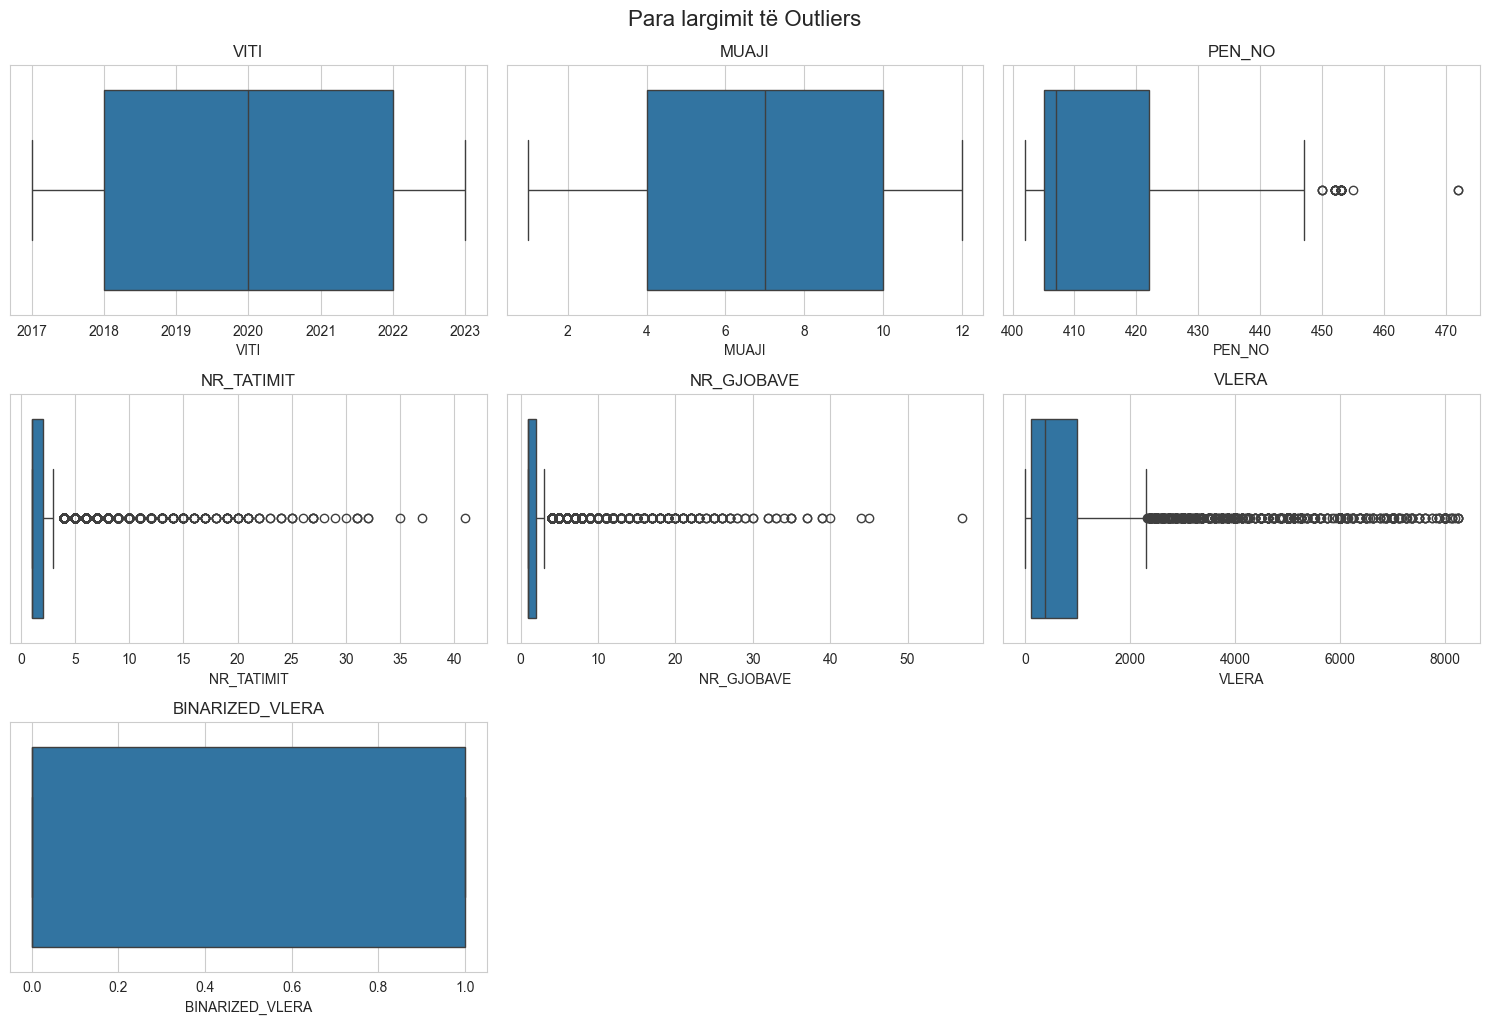

Outliers e larguar nga dataset-i:
                                                 ID_UNIKE  VITI  MUAJI  \
47     8/2018_Artet, Argetimi dhe rekreacioni_Shoqëri...  2018      8   
85     4/2019_Tregtia me shumice dhe pakice; Riparimi...  2019      4   
87     12/2019_Tregtia me shumice dhe pakice; Riparim...  2019     12   
92     4/2020_Tregtia me shumice dhe pakice; Riparimi...  2020      4   
101                    11/2017_Person Fizik_Person fizik  2017     11   
...                                                  ...   ...    ...   
29562     1/2017_Artet, Argetimi dhe rekreacioni_SH.P.K.  2017      1   
29608  5/2019_Tregtia me shumice dhe pakice; Riparimi...  2019      5   
29631       3/2023_Aktivitetet e tjera sherbyese_SH.P.K.  2023      3   
29641                  10/2021_Person Fizik_Person fizik  2021     10   
29670       6/2017_Aktivitetet e tjera sherbyese_SH.P.K.  2017      6   

                                     PERSHKRIMI_SEKTORIT    LLOJI_KOMPANISE  \
47       

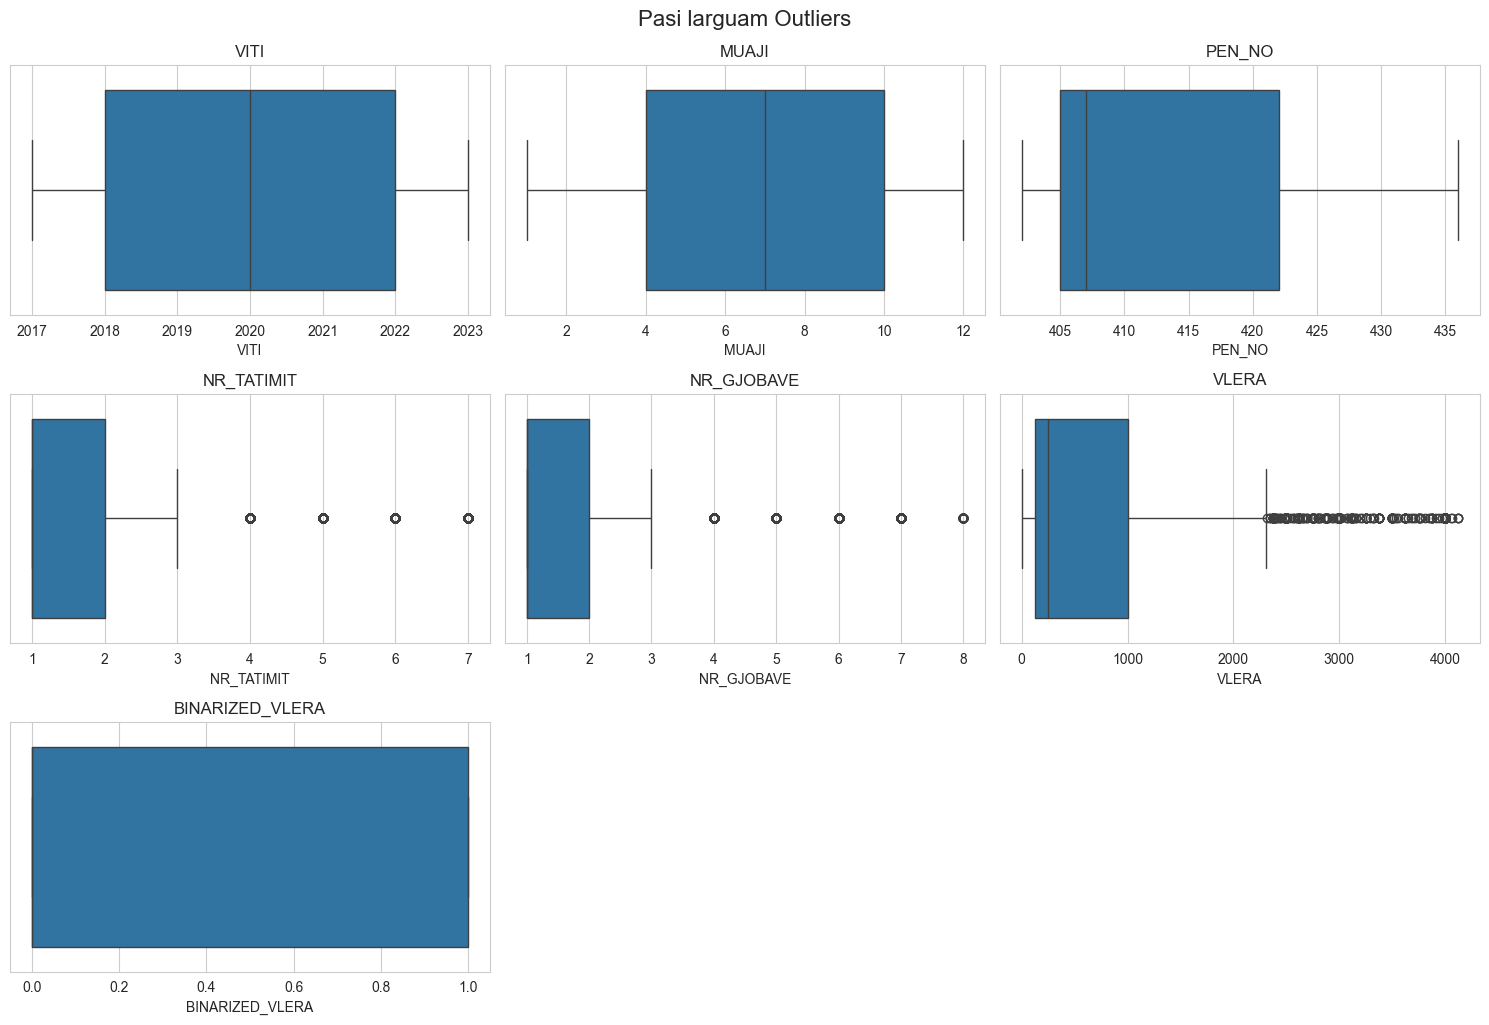

In [14]:
# Detektimi i përjashtuesit.

# Duke supozuar se 'të dhënat' janë të dhënat tuaja të parapërpunuara
data = dataset_preprocessed
 
# Përzgjedhja e kolonave numerike
numeric_columns = data.select_dtypes(include=['number']).columns
 
# Vizualizimi i grupit të të dhënave përpara se të hiqni outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=data[column])
    plt.title(column)
plt.tight_layout()
plt.suptitle('Para largimit të Outliers', fontsize=16, y=1.02)
plt.show()
 
# Llogaritja e z-scores
z_scores = stats.zscore(data[numeric_columns])
abs_z_scores = np.abs(z_scores)
 
# Filtrimi i të dhënave
filtered_entries = (abs_z_scores < 3).all(axis=1)
data_cleaned = data[filtered_entries]
 
# Nxjerrja dhe shfaqja e outliers
outliers = data[~filtered_entries]
print("Outliers e larguar nga dataset-i:\n", outliers)
 
# Vizualizimi i grupit të të dhënave pas heqjes së outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=data_cleaned[column])
    plt.title(column)
plt.tight_layout()
plt.suptitle('Pasi larguam Outliers', fontsize=16, y=1.02)
plt.show()

In [15]:
# Largimi i Anomalive

# Përcaktoni një funksion për të kontrolluar për anomali në grupin e të dhënave
def check_anomalies(data_cleaned):
    anomalies = {}

    # Kontrolloni për anomali në kolonën 'VITI' (Viti)
    anomalies['VITI'] = data_cleaned[~data_cleaned['VITI'].apply(lambda x: 2000 <= x <= 2024)]

    # Kontrolloni për anomali në kolonën 'MUAJI' (Muaji)
    anomalies['MUAJI'] = data_cleaned[~data_cleaned['MUAJI'].apply(lambda x: 1 <= x <= 12)]

    # Kontrollo për anomali në 'PERSHKRIMI_SEKTORIT' (gjatësia shumë e shkurtër ose shumë e gjatë)
    anomalies['PERSHKRIMI_SEKTORIT'] = data_cleaned[(data_cleaned['PERSHKRIMI_SEKTORIT'].str.len() < 3) | 
                                                     (data_cleaned['PERSHKRIMI_SEKTORIT'].str.len() > 100)]

    # Kontrollo për null values ose shumë të gjata në 'LLOJI_KOMPANISE'
    anomalies['LLOJI_KOMPANISE'] = data_cleaned[(data_cleaned['LLOJI_KOMPANISE'].str.len() < 1) | 
                                               (data_cleaned['LLOJI_KOMPANISE'].str.len() > 50)]

    # Kontrollo për null values ose shumë të gjata në 'KOMUNA'
    anomalies['KOMUNA'] = data_cleaned[(data_cleaned['KOMUNA'].str.len() < 1) | 
                                               (data_cleaned['KOMUNA'].str.len() > 50)]

    # Kontrollo për parregullsi në 'PEN_NO' (vlera jo numerike)
    anomalies['PEN_NO'] = data_cleaned[~data_cleaned['PEN_NO'].apply(lambda x: str(x).isdigit())]

    # Kontrollo për null values ose shumë të gjata në "PEN_TYPE_DESC_F"
    anomalies['PEN_TYPE_DESC_F'] = data_cleaned[(data_cleaned['PEN_TYPE_DESC_F'].str.len() < 3) | 
                                                       (data_cleaned['PEN_TYPE_DESC_F'].str.len() > 200)]

    # Kontrollo për vlera negative në 'NR_TATIMIT' dhe 'NR_GJOBAVE'
    anomalies['NR_TATIMIT'] = data_cleaned[(data_cleaned['NR_TATIMIT'] < 0) | (data_cleaned['NR_GJOBAVE'] < 0)]

    # Kontrollo për vlera negative në 'VLERA'
    anomalies['VLERA'] = data_cleaned[data_cleaned['VLERA'] < 0]

    return anomalies

# Kontrolloni grupin e të dhënave për anomali
anomalies = check_anomalies(data_cleaned)

# Anomalitë e printimit
for anomaly_type, anomaly_data in anomalies.items():
    if not anomaly_data.empty:
        print(f"Anomalitë në {anomaly_type}:")
        print(anomaly_data)
    else:
        print(f"Nuk u zbuluan anomali në {anomaly_type}.")

# Hiqni anomalitë nga grupi i të dhënave
for anomaly_data in anomalies.values():
    data_cleaned = data.drop(anomaly_data.index)

# Shfaq grupin e të dhënave të pastruar
data_cleaned.head()


Nuk u zbuluan anomali në VITI.
Nuk u zbuluan anomali në MUAJI.
Anomalitë në PERSHKRIMI_SEKTORIT:
                                                ID_UNIKE  VITI  MUAJI  \
22962  6/2022_Aktivitetet e ekonomive familjare si pu...  2022      6   
26999  5/2022_Aktivitetet e ekonomive familjare si pu...  2022      5   
27175  6/2022_Aktivitetet e ekonomive familjare si pu...  2022      6   
28081  7/2017_Aktivitetet e ekonomive familjare si pu...  2017      7   
28253  6/2022_Aktivitetet e ekonomive familjare si pu...  2022      6   

                                     PERSHKRIMI_SEKTORIT LLOJI_KOMPANISE  \
22962  Aktivitetet e ekonomive familjare si punedhene...      Individual   
26999  Aktivitetet e ekonomive familjare si punedhene...      Individual   
27175  Aktivitetet e ekonomive familjare si punedhene...      Individual   
28081  Aktivitetet e ekonomive familjare si punedhene...      Individual   
28253  Aktivitetet e ekonomive familjare si punedhene...      Individual   

       

,ID_UNIKE,VITI,MUAJI,PERSHKRIMI_SEKTORIT,LLOJI_KOMPANISE,KOMUNA,PEN_NO,PEN_TYPE_DESC_F,NR_TATIMIT,NR_GJOBAVE,VLERA,MUAJI/VITI,BINARIZED_VLERA
0,12/2020_Ndertimtaria_Individual,2020,12,Ndertimtaria,Individual,DRAGASH,405,Nd.Neni.53(2.1)-Law 03/L-222,3,3,375.0,12/2020,0
1,7/2017_Aktivitetet e tjera sherbyese_Individual,2017,7,Aktivitetet e tjera sherbyese,Individual,VITI,405,Nd.Neni.53(2.1)-Law 03/L-222,2,2,250.0,7/2017,0
2,7/2023_Aktivitetet e tjera sherbyese_Individual,2023,7,Aktivitetet e tjera sherbyese,Individual,VUSHTRRI,404,Nd.Neni.53 (1)-Law 03/L-222,1,1,125.0,7/2023,0
3,3/2022_Tregtia me shumice dhe pakice; Riparimi...,2022,3,Tregtia me shumice dhe pakice; Riparimi i mjet...,SH.P.K.,FUSHË KOSOVË,422,Nd.Neni.53.6-Law 03/L-222,2,2,1500.0,3/2022,1
4,4/2021_Tregtia me shumice dhe pakice; Riparimi...,2021,4,Tregtia me shumice dhe pakice; Riparimi i mjet...,Individual,DEÇAN,422,Nd.Neni.53.6-Law 03/L-222,3,3,375.0,4/2021,0


C:\Users\Festi\AppData\Local\Temp\ipykernel_16304\102685865.py:32: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
C:\Users\Festi\PycharmProjects\Vleresimi-i-gjobave-te-leshuara-nga-ATK\venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


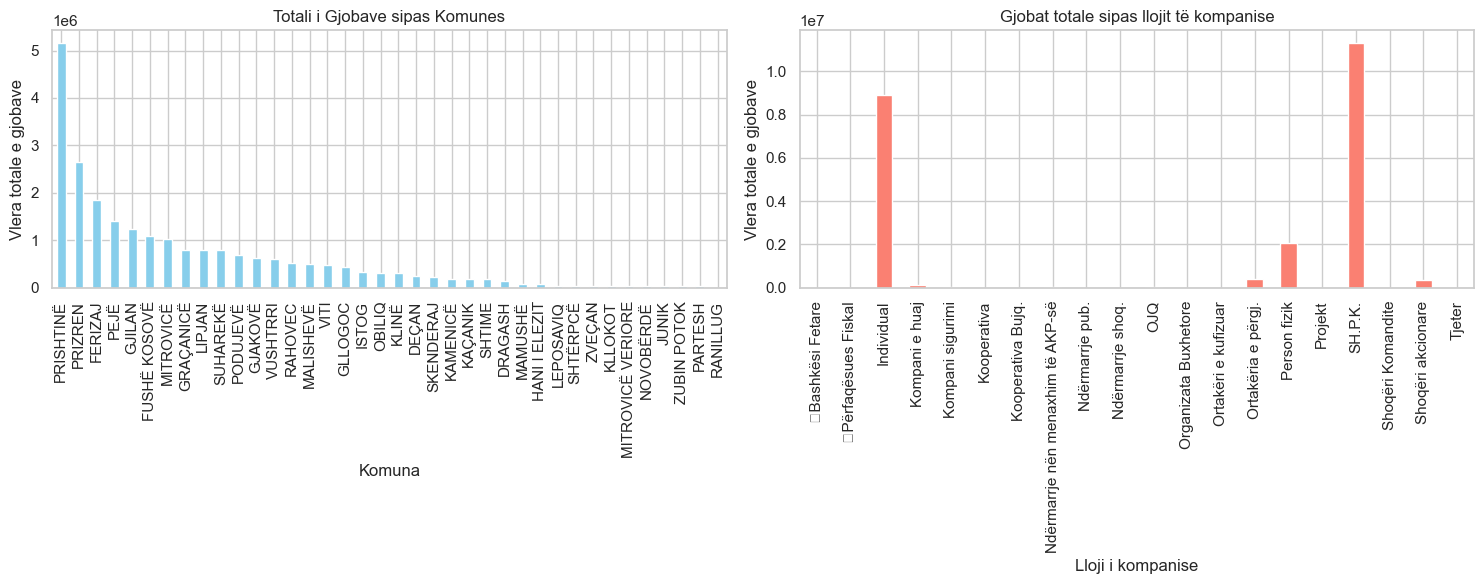

In [16]:
#Mënjanimi i zbulimeve jo të sakta

# Vendosja e stilit te vizualizimit
sns.set(style="whitegrid")

# Analiza 1: Vleresimi i shperndarjes së gjobave neper KOMUNA
municipality_analysis = data_cleaned.groupby('KOMUNA')['VLERA'].sum().sort_values(ascending=False)

# Analiza 2: Krahasimi i gjobave midis llojeve te ndryshme te kompanive (LLOJI_KOMPANISE)
company_type_analysis = data_cleaned.groupby('LLOJI_KOMPANISE')['VLERA'].sum()

# Plot i rezultateve
plt.figure(figsize=(15, 6))

# Plot per analizen komunale
plt.subplot(1, 2, 1)
municipality_analysis.plot(kind='bar', color='skyblue')
plt.title('Totali i Gjobave sipas Komunes')
plt.xlabel('Komuna')
plt.ylabel('Vlera totale e gjobave')
plt.xticks(rotation=90)

# Plot per analizen e llojit te kompanise
plt.subplot(1, 2, 2)
company_type_analysis.plot(kind='bar', color='salmon')
plt.title('Gjobat totale sipas llojit të kompanise')
plt.xlabel('Lloji i kompanise')
plt.ylabel('Vlera totale e gjobave')
plt.xticks(rotation=90)

# Rregullimi i paraqitjes
plt.tight_layout()

plt.show()


Llojet e të dhënave të secilës kolonë:
 ID_UNIKE                object
VITI                     int64
MUAJI                    int64
PERSHKRIMI_SEKTORIT     object
LLOJI_KOMPANISE         object
KOMUNA                  object
PEN_NO                   int64
PEN_TYPE_DESC_F         object
NR_TATIMIT               int64
NR_GJOBAVE               int64
VLERA                  float64
MUAJI/VITI              object
BINARIZED_VLERA          int64
dtype: object
Statistikat përshkruese për kolonat numerike:
                VITI        MUAJI        PEN_NO    NR_TATIMIT    NR_GJOBAVE  \
count  29301.000000  29301.00000  29301.000000  29301.000000  29301.000000   
mean    2020.006519      6.69728    411.511211      1.671240      1.828436   
std        1.968192      3.35888      8.278707      1.842706      2.215941   
min     2017.000000      1.00000    402.000000      1.000000      1.000000   
25%     2018.000000      4.00000    405.000000      1.000000      1.000000   
50%     2020.000000      7.0

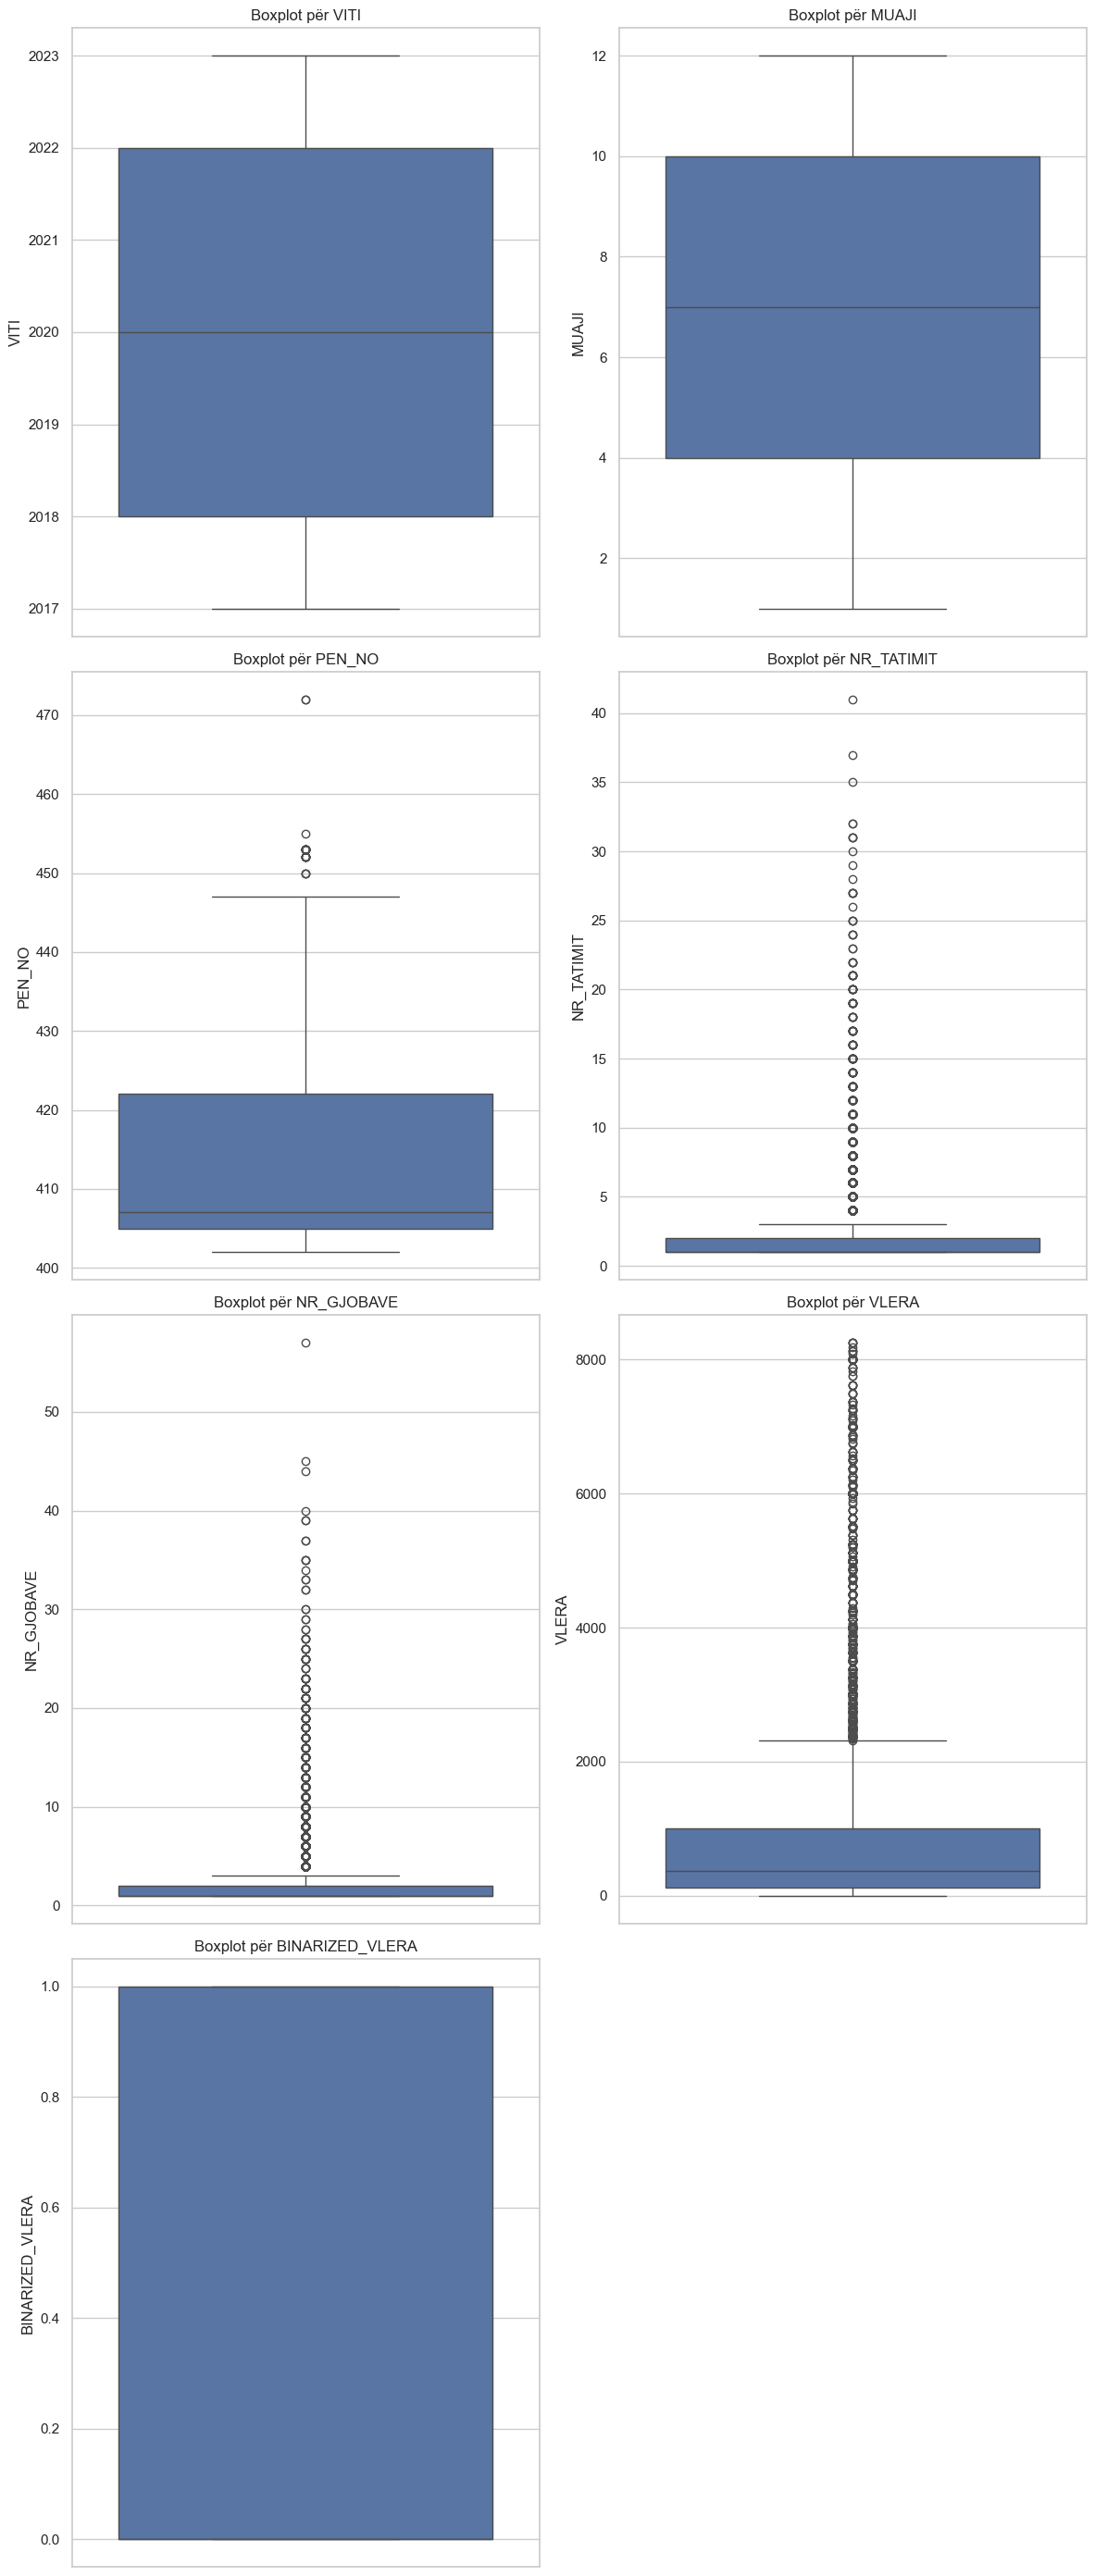

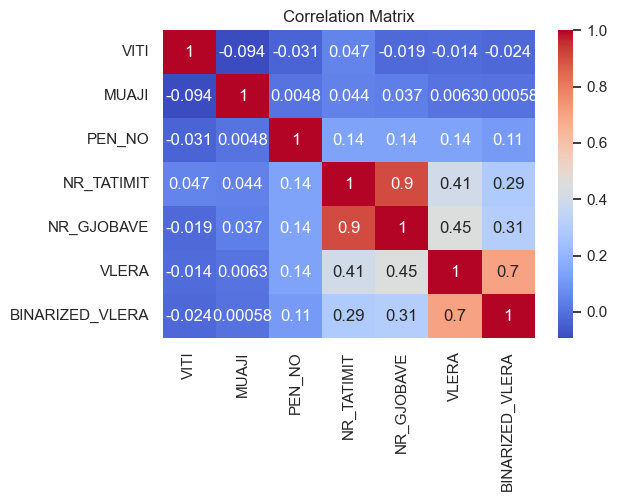

PCA Rezultati:
 [[-417.14353428   -5.99152257]
 [-542.14497149   -5.89019102]
 [-667.14757224   -6.84343968]
 ...
 [-667.12884305   11.14271165]
 [-292.14483051   -4.21381197]
 [-542.1288044    11.04846054]]


In [17]:
#Eksplorimi i te dhënave: statistika përmbledhëse, multivariante.

# Eksplorimi paraprak i të dhënave
# Kuptimi i kolonave dhe llojet e tyre të të dhënave
print("Llojet e të dhënave të secilës kolonë:\n", data_cleaned.dtypes)

# Përmblidhni statistikat
# Statistika përshkruese për kolonat numerike
numerical_columns = data_cleaned.select_dtypes(include=['number'])
print("Statistikat përshkruese për kolonat numerike:\n", numerical_columns.describe())

# Numërimi i frekuencës për të dhënat kategorike
categorical_columns = data.select_dtypes(include=['object'])
for column in categorical_columns:
    print(f"Numërimi i frekuencës për {column}:\n", data_cleaned[column].value_counts())

# Kontrolli i cilësisë së të dhënave
# Kontrollimi për vlerat që mungojnë
print("Vlerat që mungojnë në secilën kolonë:\n", data_cleaned.isnull().sum())

# # Kontrollimi për outliers duke përdorur boxplots për kolonat numerike
num_cols = len(numerical_columns.columns)
plt.figure(figsize=(12, num_cols * 4))
for i, column in enumerate(numerical_columns.columns):
    plt.subplot((num_cols + 1) // 2, 2, i + 1)
    sns.boxplot(y=data_cleaned[column])
    plt.title(f"Boxplot për {column}")
plt.tight_layout()
plt.show()

# Multivariate Analiza
# Correlation Analiza
correlation_matrix = numerical_columns.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Eksplorim vizual permes PCA duke reduktuar dimensionalitetin dhe ruajtur sa ma shume informacion.
pca = PCA(n_components=2)
pca_result = pca.fit_transform(numerical_columns)
print("PCA Rezultati:\n", pca_result)

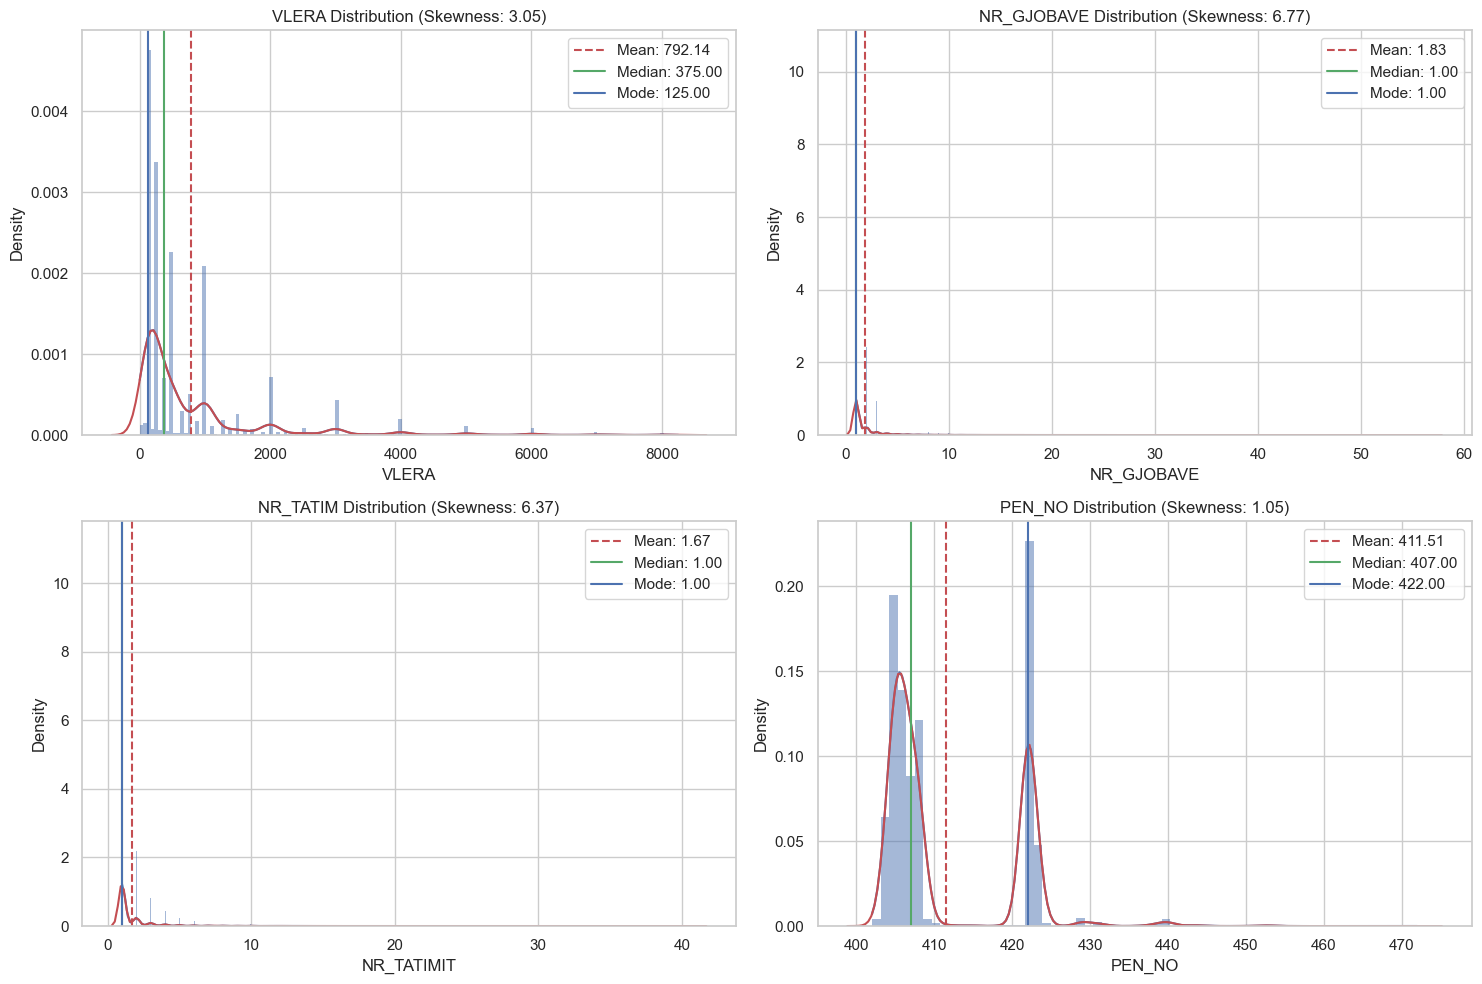

In [18]:
#Adresimi i shtremberimit te te dhenave
skewness_data = data_cleaned[['VLERA', 'NR_GJOBAVE', 'NR_TATIMIT', 'PEN_NO']]
 
 
# Llogaritja e anshmërisë për variablat e specifikuar
skewness_values = skewness_data.skew()
skewness_values
 
# Funksioni për të hartuar shpërndarjen dhe shtoni një rresht për anim
def plot_distribution_with_skewness(series, ax, title):
    sns.histplot(series, kde=True, stat="density", linewidth=0, ax=ax)
    sns.kdeplot(series, color="r", ax=ax)
 
    # Skewness
    skewness = series.skew()
 
    # Mean, Median, Mode
    mean = series.mean()
    median = series.median()
    mode = series.mode().values[0]
 
    # Plot mean, median, mode
    ax.axvline(mean, color='r', linestyle='--', label=f'Mean: {mean:.2f}')
    ax.axvline(median, color='g', linestyle='-', label=f'Median: {median:.2f}')
    ax.axvline(mode, color='b', linestyle='-', label=f'Mode: {mode:.2f}')
 
    ax.legend()
    ax.set_title(f'{title} (Skewness: {skewness:.2f})')
 
# Krijimi i nënplotesave për secilën variabël
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
 
# Komplotimi i çdo shpërndarjeje me vijën e shtrembërimit
plot_distribution_with_skewness(skewness_data['VLERA'], axes[0, 0], "VLERA Distribution")
plot_distribution_with_skewness(skewness_data['NR_GJOBAVE'], axes[0, 1], "NR_GJOBAVE Distribution")
plot_distribution_with_skewness(skewness_data['NR_TATIMIT'], axes[1, 0], "NR_TATIM Distribution")
plot_distribution_with_skewness(skewness_data['PEN_NO'], axes[1, 1], "PEN_NO Distribution")
 
plt.tight_layout()
plt.show()


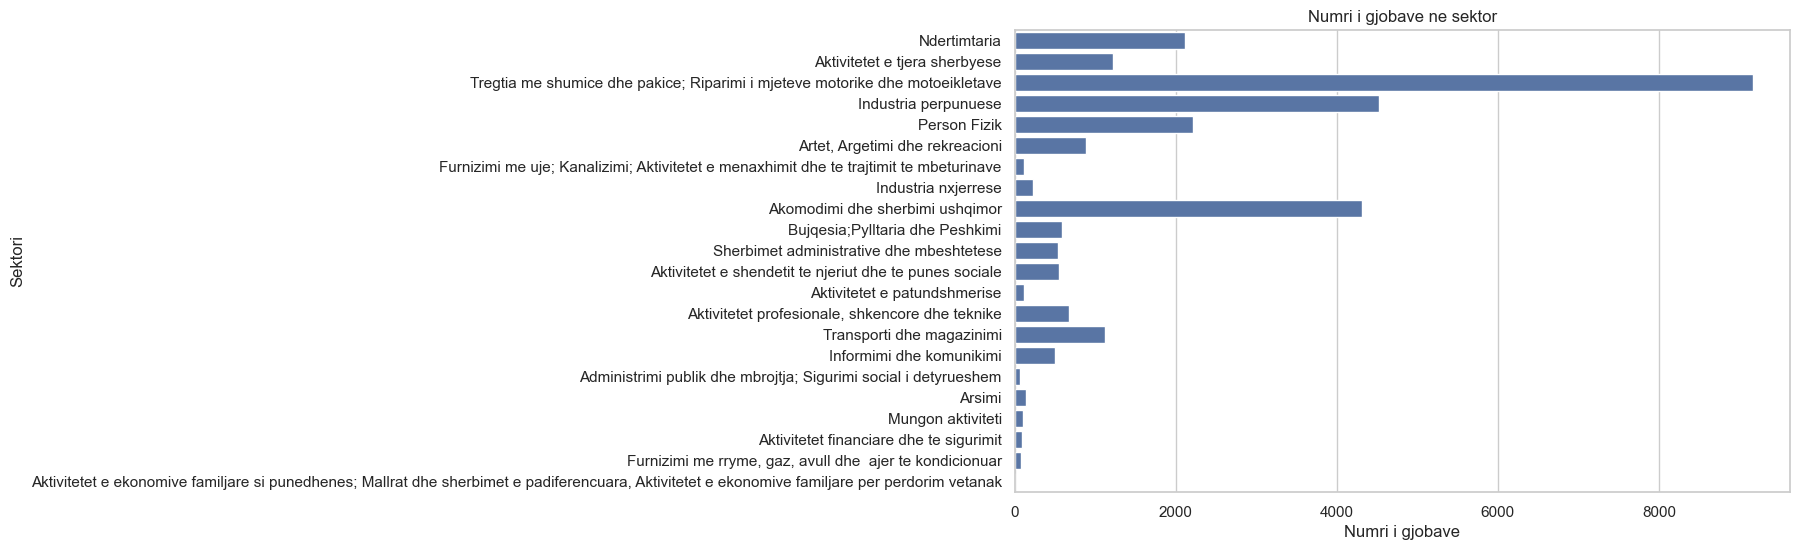

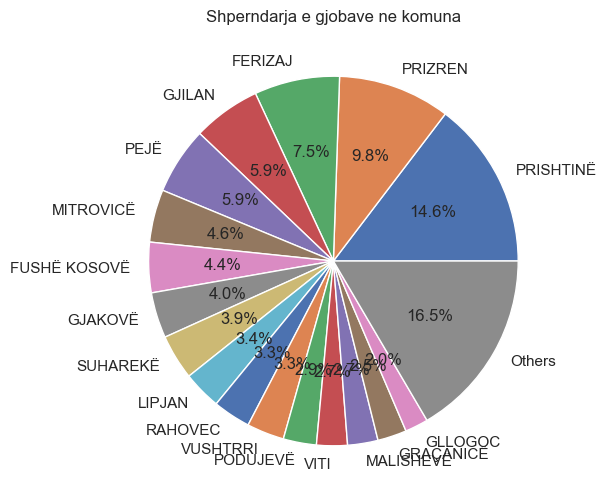

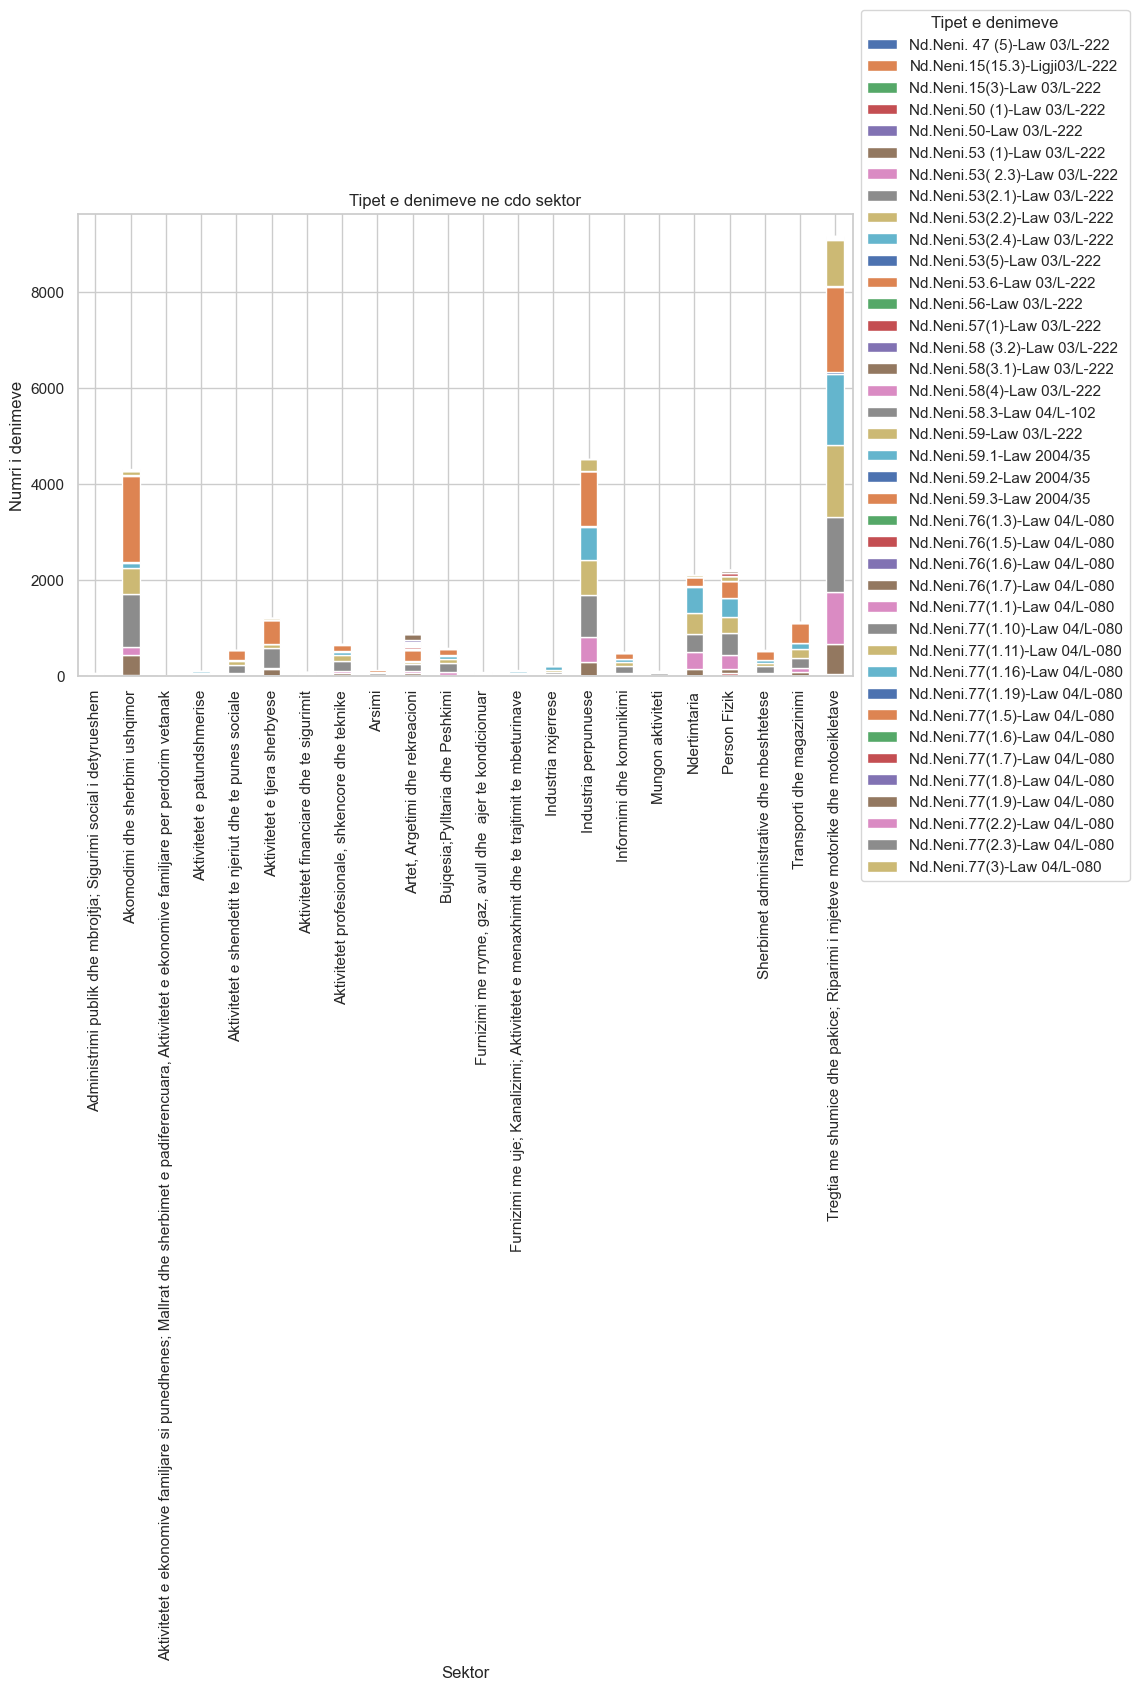

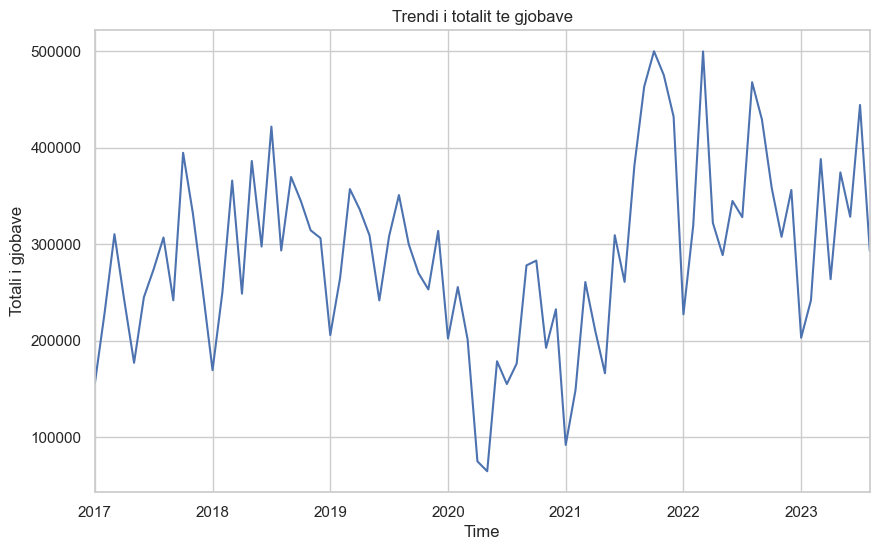

In [55]:

# Konvertimi vitit dhe muajit 
data_cleaned['Date'] = pd.to_datetime(data_cleaned['VITI'].astype(str) + '-' + data_cleaned['MUAJI'].astype(str))

# Bar Chart: Numri i gjobave ne sektor
plt.figure(figsize=(10, 6))
sns.countplot(y='PERSHKRIMI_SEKTORIT', data=data_cleaned)
plt.title('Numri i gjobave ne sektor')
plt.xlabel('Numri i gjobave')
plt.ylabel('Sektori')
plt.show()

# Pie Chart:shperndarja e gjobave ne komuna
municipality_counts = data_cleaned['KOMUNA'].value_counts()
others_threshold = municipality_counts.sum() * 0.02  # 1.5%
small_groups = municipality_counts[municipality_counts < others_threshold]
municipality_counts = municipality_counts[municipality_counts >= others_threshold]
municipality_counts['Others'] = small_groups.sum()
plt.figure(figsize=(10, 6))
plt.pie(municipality_counts, labels=municipality_counts.index, autopct='%1.1f%%')
plt.title('Shperndarja e gjobave ne komuna')
plt.show()

# Stacked Bar Chart: Tipet e denimeve ne cdo sektor
penalty_sector = data_cleaned.groupby(['PERSHKRIMI_SEKTORIT', 'PEN_TYPE_DESC_F']).size().unstack().fillna(0)
ax = penalty_sector.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Tipet e denimeve ne cdo sektor')
plt.xlabel('Sektor')
plt.ylabel('Numri i denimeve')
plt.legend(title='Tipet e denimeve', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Line Graph: Trendi i totalit te gjobave
total_fines_over_time = data_cleaned.groupby('Date')['Viti'].sum()
plt.figure(figsize=(10, 6))
total_fines_over_time.plot()
plt.title('Trendi i totalit te gjobave')
plt.xlabel('Time')
plt.ylabel('Totali i gjobave')
plt.show()



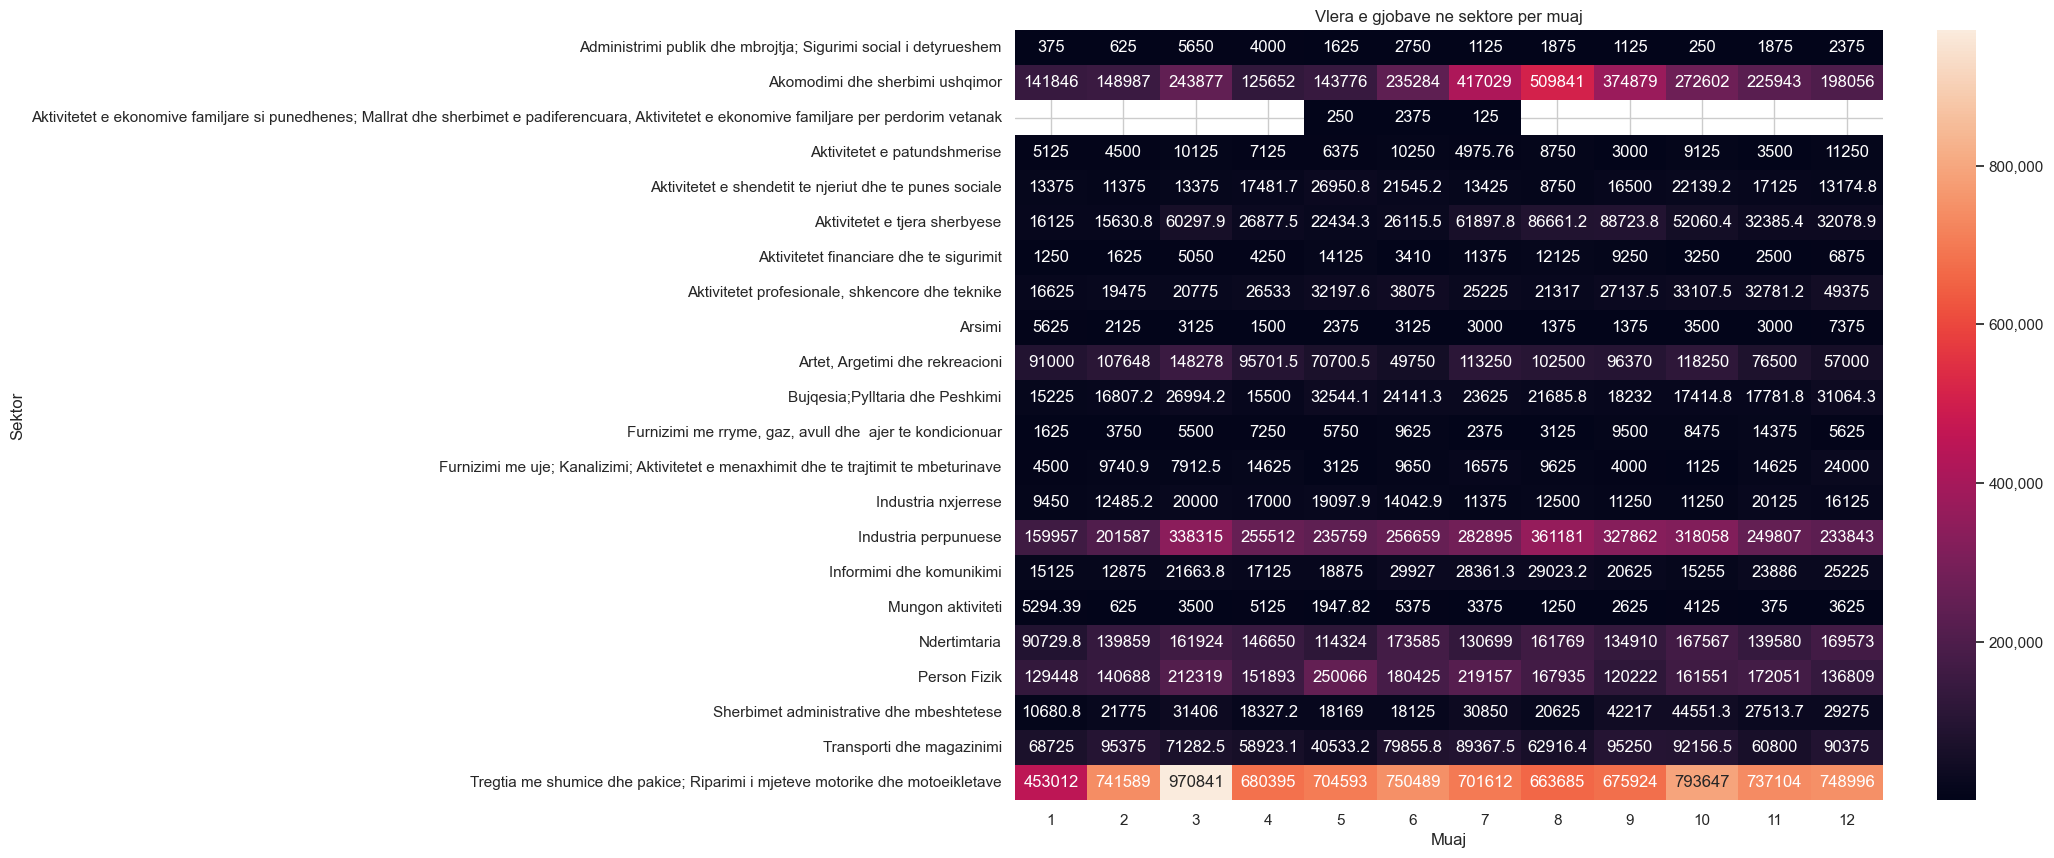

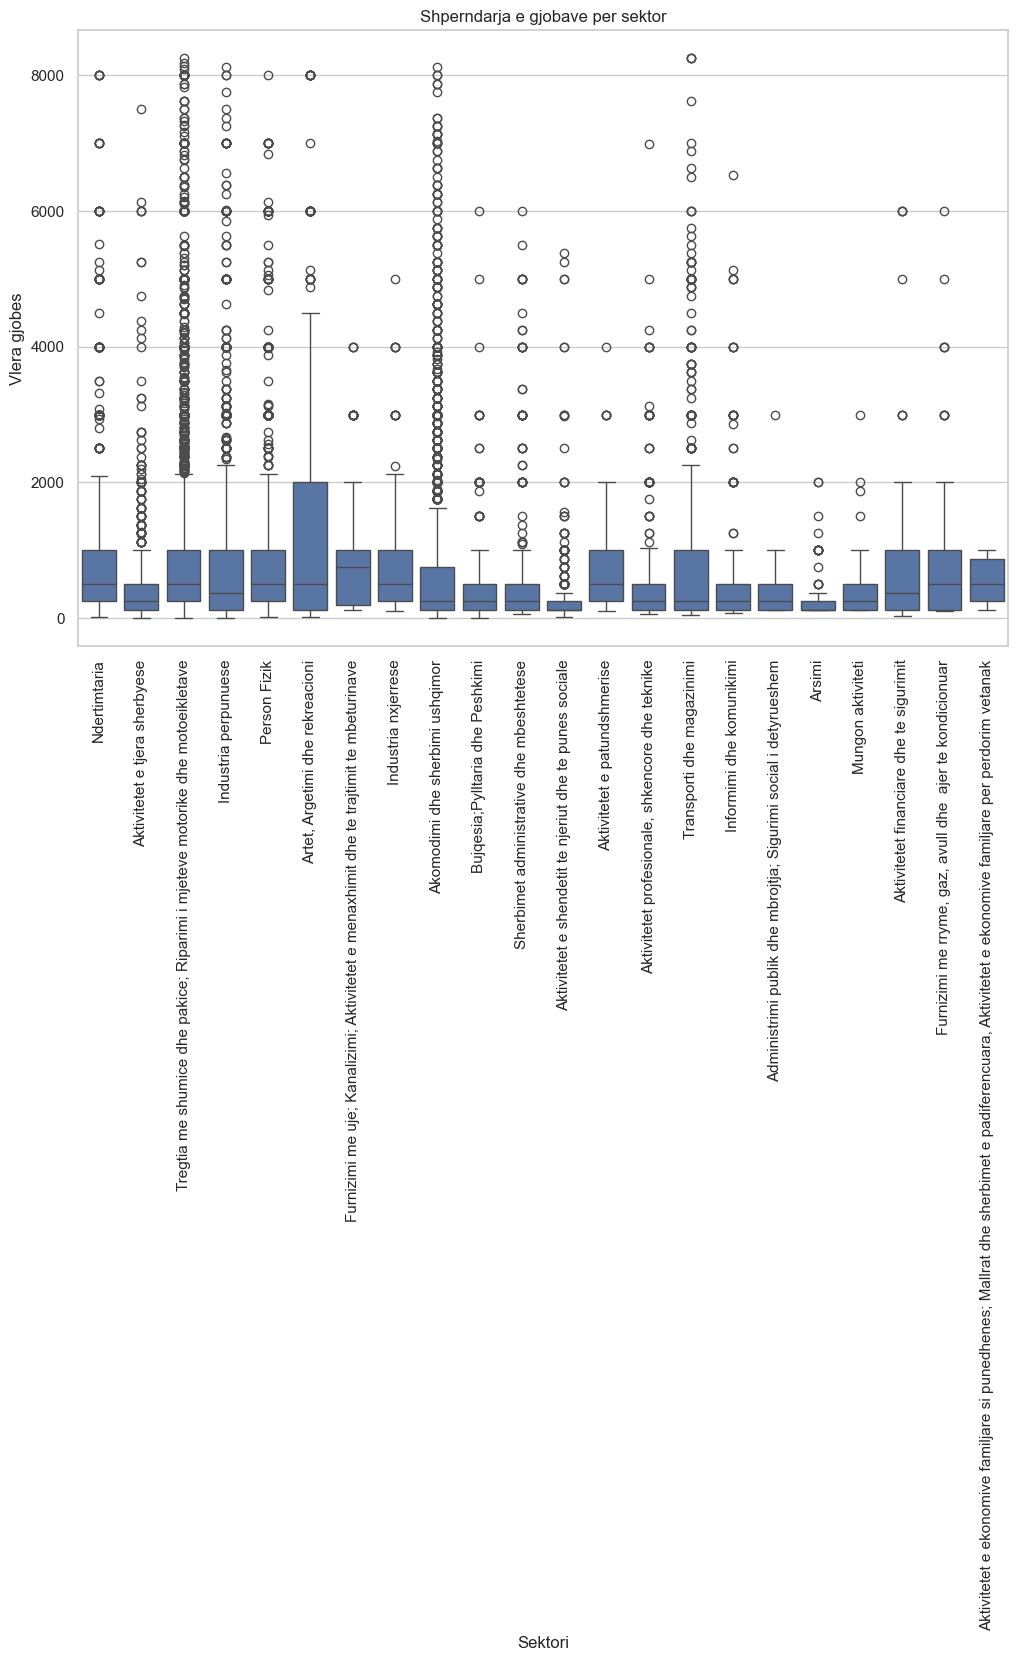

In [56]:
import matplotlib.ticker as ticker

# Heat Map: Densiteti i gjobave ne komuna

data = data.reset_index(drop=True).reset_index()
data.rename(columns={'index': 'ID_NO'}, inplace=True)
pivot_data = data.pivot_table(values='VLERA', index='PERSHKRIMI_SEKTORIT', columns='MUAJI', aggfunc='sum')

plt.figure(figsize=(14, 10))  
ax = sns.heatmap(pivot_data, annot=True, fmt="g", cbar=True) 

cbar = ax.collections[0].colorbar

cbar.ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.title('Vlera e gjobave ne sektore per muaj')
plt.xlabel('Muaj')
plt.ylabel('Sektor')
plt.show()

# Box Plot: Shperndarja e gjobave per sektor
plt.figure(figsize=(12, 8))
sns.boxplot(x='PERSHKRIMI_SEKTORIT', y='VLERA', data=data_cleaned)
plt.xticks(rotation=90)
plt.title('Shperndarja e gjobave per sektor')
plt.ylabel('Vlera gjobes')
plt.xlabel('Sektori')
plt.show()


In [53]:
import os

#Krijo folderin 'data' nese nuk egziston
os.makedirs('data', exist_ok=True)

# Ruaj datasetin
data_cleaned.to_csv('../data/data_cleaned.csv', index=False)
